# 3. 데이터 전처리

### 3.1 개별 변수 정제방법

`결측치 처리`
* 결손값, 즉 NaN, Null값은 허용되지 않음 : NULL값은 고정된 다른 값으로 변환해야 함
* feature 값 중 Null값이 얼마 없다면 평균값 등으로 대체
* Null값이 대부분이라면 Drop

`데이터 인코딩`
* 문자열값을 입력값으로 허용하지 않음 : 문자열 값을 인코딩해서 숫자형으로 변환
* 필드가 문자열인 값 : 카테고리형 피처, 텍스트 피처
* 카테고리형 피처 - 코드값으로 표현하는 것이 적합
* 텍스트형 피처 - 피처 벡터화 기법으로 벡터화 혹은 불필요한 피처일 경우 삭제(주민번호, 단순ID)
* (NaN = 숫자가 아닌것, NULL = 없는것)

* 레이블 인코딩 : 카테고리 피처 -> 코드형 숫자로 변환(LabelEncoder) =>  encodr.transform(items)
* 원-핫 인코딩 : 새로운 피처를 추가해 고유값 컬럼만 1로 나머지는 0으로 처리하는 방식 (OneHotEncoder)

### 3.2 데이터 인코딩

###### 3.2.1 레이블 인코딩

In [1]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

In [2]:
items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값 : ", labels)

# print("인코딩 클래스 : ", encoder.classes_)
# print("디코딩 원본값 : ", encoder,encoder.inverse_transform([4,5,2,0,1,1,3,4,2]))

인코딩 변환값 :  [0 1 4 5 3 3 2 2]


* 문제점
레이블 인코딩이 숫자의 크고 작음이 있는 값으로 변환되면서 특정 ML 알고리즘에서 가중치가 더 부여되는 문제가 발생
트리 계열의 알고리즘은 문제가 없으나 선형회귀 알고리즘은 문제 발생

*** 원-핫 인코딩이 이 문제들을 해결

###### 3.2.2 원-핫 인코딩

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [4]:
items = ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

labels = labels.reshape(-1,1)
print(labels)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels)

print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

[0 1 4 5 3 3 2 2]
[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


###### 3.2.3 원-핫 인코딩 : 판다스

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'item' : ["TV", "냉장고", "전자레인지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})
pd.get_dummies(df)

item_TV  item_냉장고  item_믹서  item_선풍기  item_전자레인지  item_컴퓨터
0        1         0        0         0           0         0
1        0         1        0         0           0         0
2        0         0        0         0           1         0
3        0         0        0         0           0         1
4        0         0        0         1           0         0
5        0         0        0         1           0         0
6        0         0        1         0           0         0
7        0         0        1         0           0         0

### 3.3 피처 스케일링 (feature scaling)

 : 두 변 수 중 하나의 값이 너무 클 경우 학습을 시킬때 가중치가 불균형하게 반영될 수 있음. 학습시 속도를 고려해서 값을 축소
*** 표준화와 정규화가 필요

표준화 : 데이터의 피처 각각이 편균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것 (StandardScalar)
정규화 : 서로 다른 피처의 크기(MinMaxScalar) 



In [37]:
from sklearn.datasets import load_iris
import pandas as pd

In [38]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print("feature 들의 평균값")
print(iris_df.mean())
print("\nfeature 들의 분산 값")
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature 들의 평균 값")
print(iris_df_scaled.mean())
print("\nfeature 들의 분산 값")
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


정규화

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최소 값")
print(iris_df_scaled.min())
print("\nfeature들의 최대 값")
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [48]:
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [49]:
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scaleehls test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scaleehls test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [53]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1),2))
print('Scaled된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))

test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


### 타이타닉 생존자 예측

타이타닉 데이터 살펴보기

* Pclass 선실 등급
* Sibsp 형제자매
* Parch 부모자식
* Fare 티켓 요금
* Cabin 사물함
* Embarked 선실명

In [51]:
import pandas as pd
titanic_df = pd.read_csv(r"titanic_train.csv")
titanic_df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [52]:
print("titanic 변수 type : ", type(titanic_df))
titanic_df

titanic 변수 type :  <class 'pandas.core.frame.DataFrame'>


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [56]:
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

* object = string 같은 정해지지 않은 타입
* std = 표준편차
* mean = 평균

In [65]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print("데이터 세트 Null 값 갯수", titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수 0


In [67]:
print("Sex 값 분포 : \n",titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 : \n", titanic_df['Cabin'].value_counts())
print("\n Embarked 값 분포 : ", titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
C106             1
C62 C64          1
E49              1
D37              1
C103             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :  S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [72]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [73]:
titanic_pclass = titanic_df['Pclass']
type(titanic_pclass)

pandas.core.series.Series

In [74]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [75]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
titanic_df = pd.read_csv(r"titanic_train.csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [140]:
titanic_df.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

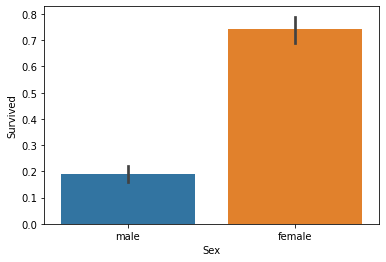

In [156]:
# 성별에 따른 생존
titanic_df.groupby(["Sex","Survived"])["Survived"].count()
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

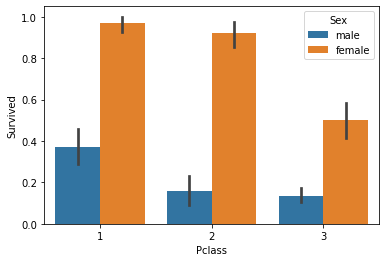

In [157]:
# 빈부격차에 따른 생존
titanic_df.groupby(["Pclass", "Survived"])["Survived"].count()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

In [171]:
def new_age (x) :
    if 0 <= x < 6:
        return "baby"
    elif 6<=x<13:
        return "child"
    elif 13<=x<19:
        return "teenager"
    elif 19<=x<26:
        return "student"
    elif 26<=x<36:
        return "young adult"
    elif 36<=x<60:
        return "adult"
    elif 61<=x:
        return "elderly"
    else:
        return "unknown"

In [172]:
titanic_df["NA"]=titanic_df["Age"].apply(new_age)

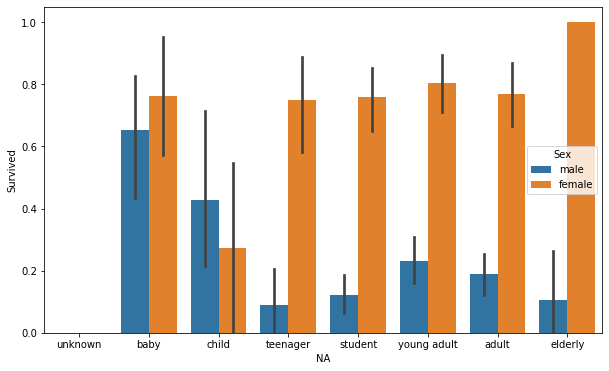

In [197]:
group_names = ['unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']
plt.figure(figsize=(10,6))
titanic_df.groupby(["NA", "Survived"])["Survived"].count()
sns.barplot(x="NA", y='Survived', hue="Sex", data=titanic_df, order=group_names)
plt.show()

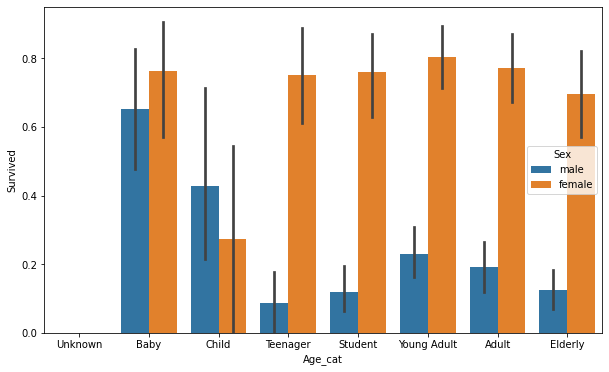

In [201]:
def get_category(age) :
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else : cat = "Elderly"
        
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df["Age"].apply(lambda x : get_category(x))
sns.barplot(x="Age_cat", y = "Survived", hue="Sex", data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)
plt.show()

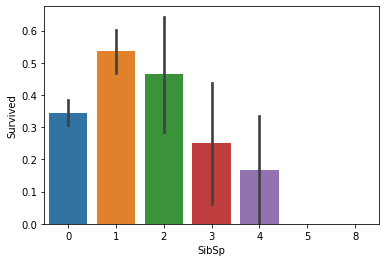

In [144]:
titanic_df.groupby(["SibSp", "Survived"])["Survived"].count()
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.show()

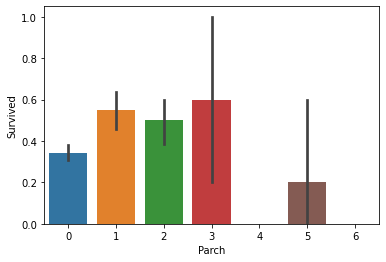

In [145]:
titanic_df.groupby(["Parch", "Survived"])["Survived"].count()
sns.barplot(x='Parch', y='Survived', data=titanic_df)
plt.show()

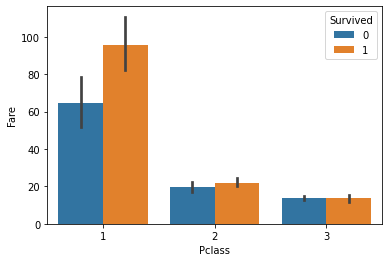

In [196]:
titanic_df.groupby(["Pclass", "Fare"])["Fare"].count()
sns.barplot(x='Pclass', y='Fare', hue = 'Survived', data=titanic_df)
plt.show()

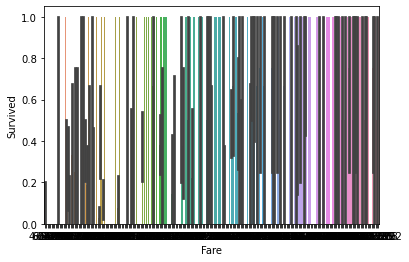

In [146]:
titanic_df.groupby(["Fare", "Survived"])["Survived"].count()
sns.barplot(x='Fare', y='Survived', data=titanic_df)
plt.show()

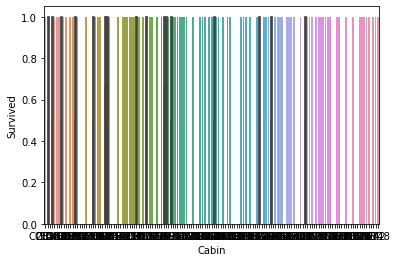

In [147]:
titanic_df.groupby(["Cabin", "Survived"])["Survived"].count()
sns.barplot(x='Cabin', y='Survived', data=titanic_df)
plt.show()

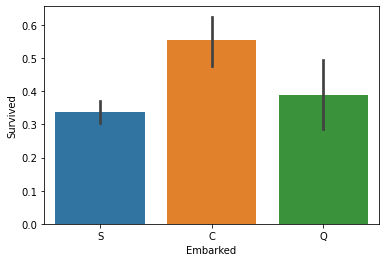

In [148]:
titanic_df.groupby(["Embarked", "Survived"])["Survived"].count()
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.show()

In [202]:
from sklearn import preprocessing

In [212]:
def encode_features(dataDF):
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features : 
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature].astype(str))
        dataDF[feature] = le.transform(dataDF[feature].astype(str))
    return dataDF
titanic_df = encode_features(titanic_df)
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked           NA  
0         A/5 21171   7.2500     54         2      student  
1          PC 17599  71.2833    128         0        adult  
2  STON/O2. 3101282   7.9250     54         2  young adult  
3            113803  53.1000     99         2  young adult  
4            373450   8.0500     54         2  young adult

In [207]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature].astype(str))
        dataDF[feature] = le.transform(dataDF[feature].astype(str))
        print(id(le))

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()



2059185032968
2059256034312
2059185032968


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked           NA  
0         A/5 21171   7.2500    147         2      student  
1          PC 17599  71.2833     81         0        adult  
2  STON/O2. 3101282   7.9250    147         2  young adult  
3            113803  53.1000     55         2  young adult  
4            373450   8.0500    147         2  young adult

In [217]:
titanic_df.groupby(["Cabin"]).count()

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Cabin                                                                        
0                1         1       1     1    1    1      1      1       1   
1                1         1       1     1    1    0      1      1       1   
2                1         1       1     1    1    1      1      1       1   
3                1         1       1     1    1    1      1      1       1   
4                2         2       2     2    2    2      2      2       2   
...            ...       ...     ...   ...  ...  ...    ...    ...     ...   
143              1         1       1     1    1    1      1      1       1   
144              2         2       2     2    2    2      2      2       2   
145              1         1       1     1    1    0      1      1       1   
146              2         2       2     2    2    2      2      2       2   
147              1         1       1     1    1    1      1      1       1   

       Fare  Embarked  NA  
Cabin                      
0         1         1   1  
1         1         1   1  
2         1         1   1  
3         1         1   1  
4         2         2   2  
...     ...       ...  ..  
143       1         1   1  
144       2         2   2  
145       1         1   1  
146       2         2   2  
147       1         1   1  

[148 rows x 12 columns]